# Analysis of Estimator Distributions Inside the Core

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re,glob,os
from scipy import integrate
from numpy import pi as π
import dgutils
from pimcscripts import pimchelp
from collections import defaultdict
from scipy import interpolate
from dgutils import colors as colortools
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.transforms as mtransforms

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# plot style
plot_style = {'aps':'../include/aps.mplstyle', 'notebook':'../include/notebook.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['notebook'])

figsize = plt.rcParams['figure.figsize']

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ρ_col = [colors[0],colors[1],colors[-2]]
grey = '#4B4B4B'

import hg_utils
from hg_utils import lab as lab

## Simulation Parameters

In [2]:
ΔR = [0.0,2.0,3.0,4.0]
T = 2.0
w = 3.0
L = 100
sim_params = {'T':T,'canonical':False,'μ':-7.2, 'L':L, 'τ':0.004}

## We load the merged (individual seeds) QMC data for the core estimators from the data directory for $\delta R = 4.0$ Å

In [3]:
cΔR = 4.0
dir_name = f'{hg_utils.base_dir(cΔR,cylinder=True,raw=False)}'
est_name = dir_name + os.sep + pimchelp.get_file_list_from_params(**sim_params,base_dir=dir_name,ftype='estimator')
est_data = np.genfromtxt(est_name,names=True,skip_header=1, deletechars="")
headers = est_data.dtype.names

## Investigate the Distributions of Various Estimators

In [4]:
from scipy.optimize import curve_fit
from scipy.stats import norm

def gaussian(x,μ,σ):
    """gaussian function used for the fit"""
    return norm.pdf(x,loc=μ,scale=σ)

def get_distribution(ax, est_type, xlabel="", ylabel="", label="", est_unit="", num_bins=20):
    hist,left = np.histogram(est_data[est_type],bins=num_bins, density=True)
    centers = left[:-1] + (left[1] - left[0])
    ax.hist(est_data[est_type], bins=num_bins, density=True, color=grey, rwidth=0.95);

    # fit the histogram
    p0 = [np.average(est_data[est_type]),np.std(est_data[est_type])]
    p1,_ = curve_fit(gaussian,centers,hist,p0)

    if label=="":
        label = est_type

    if est_unit=="":
        label_unit = ""
    else:
        label_unit = f' ({est_unit})'

    ax.set_xlabel(f'${label}$ ' + label_unit )
    ax.set_ylabel(f'$P\,({label})$')
        
    fit_label = r'$\langle$' + label + r'$\rangle$' + f'$ \simeq {p1[0]:.1f}$ ' + est_unit + '\n' + f'$\sigma_{{{label}}} \simeq {p1[1]:.1f}$ '+ est_unit
    
    # Plot the gaussian fit
    x = np.linspace(np.min(est_data[est_type]),np.max(est_data[est_type]),1000)
    ax.plot(x,gaussian(x,*p1), lw=2, color=colors[-2], label=fit_label)
    ax.legend()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


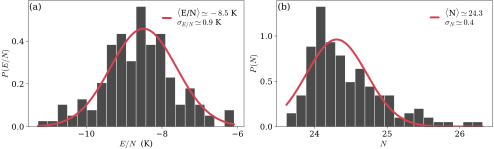

In [5]:
est_type = 'E/N'
descrip = pimchelp.Description()

with plt.style.context(plot_style['aps']):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False, sharey=False, figsize=(2*figsize[0],figsize[1]), constrained_layout=True)

    get_distribution(ax[0],'E/N', est_unit='K')
    get_distribution(ax[1],'N')

    # Add a possible labels
    trans = mtransforms.ScaledTranslation(1/72, -9/72, fig.dpi_scale_trans)
    ax[0].text(0.0, 1.0, '(a)', transform=ax[0].transAxes + trans)
    ax[1].text(0.0, 1.0, '(b)', transform=ax[1].transAxes + trans)

    plt.savefig('../figures/seed_distributions.pdf')